Importing the Modules

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Uploading and the concatenating the datasets

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15_1.csv',encoding='cp1252')
data2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15_2.csv',encoding='cp1252')
data3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15_3.csv',encoding='cp1252')
data4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15_4.csv',encoding='cp1252')
dataset=pd.concat([data1,data2,data3,data4],ignore_index=True)
dataset=pd.DataFrame(dataset)
del data1
del data2
del data3
del data4

<ipython-input-2-5c369ca32fc9>:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15_1.csv',encoding='cp1252')
<ipython-input-2-5c369ca32fc9>:2: DtypeWarning: Columns (3,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15_2.csv',encoding='cp1252')


In [ ]:
dataset

,srothers,sport,dstothers,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,others,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,others,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,others,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,others,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,others,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,Normal,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,others,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,Normal,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,others,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,Normal,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,others,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,Normal,0


In [ ]:
dataset['attack_cat'].unique()

array(['Normal', 'Exploits', 'Reothersnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis'],
      dtype=object)

Identifying and assigning the Dependant and Independant variables

In [ ]:
X=dataset.drop(axis=1,columns=['attack_cat','Label','sport','dsport','ct_ftp_cmd'])
y=dataset.drop(axis=1,columns=dataset.iloc[:,0:47])
y1=y.drop(axis=1,columns=['Label'])
y1=y1.drop(axis=0,index=y1[y1['attack_cat']=="Normal"].index)
print(y1.shape)
y1=y1['attack_cat'].values
y2=dataset['Label'].values

(321283, 1)


1. Plotting the graphs for Attack vs Not Attack
2. Plotting the graphs to show the count of distinct attacks

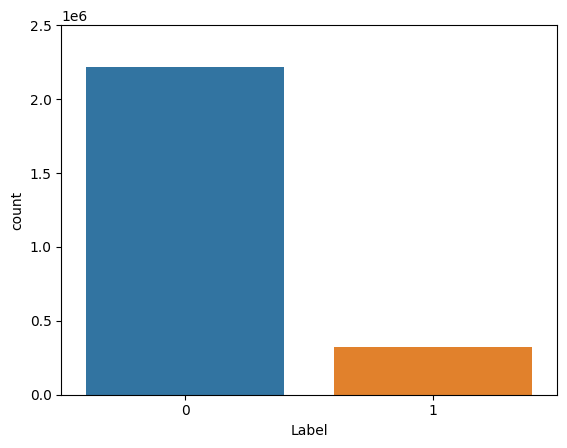

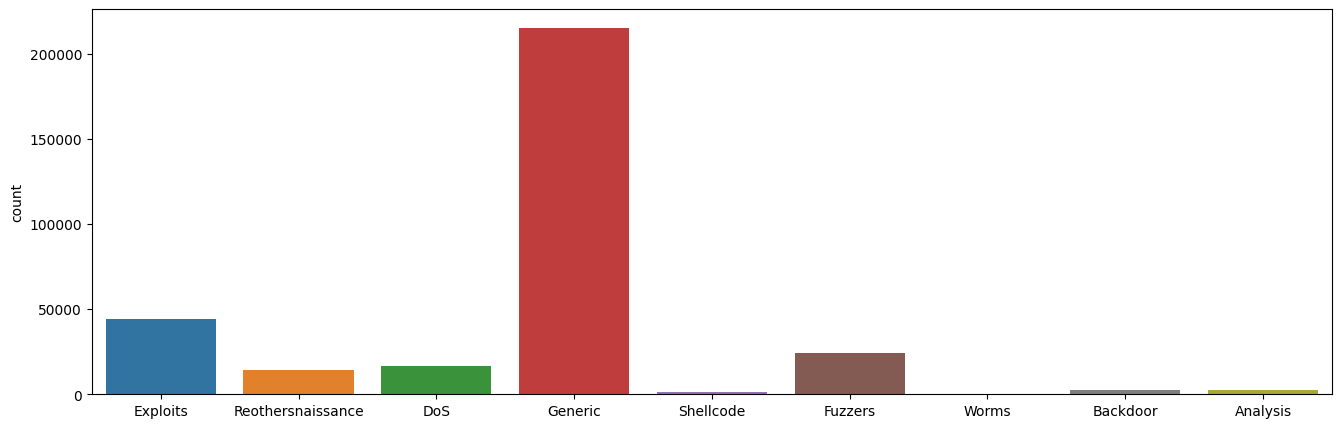

In [ ]:
g=sns.countplot(x=dataset['Label'])
g.set(ylim=(0,2500000))
plt.show()

plt.figure(figsize=(16,5))
h=sns.countplot(x=y1)
plt.show()

In [ ]:
def bar_plot_data(df: dict, field: str, subtitle: str, figsize=(5, 4), top_filter=15):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)

    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)

    total=len(df[field])

    df_filter = df[field].value_counts().rename_axis(field).reset_index(name='counts')
    if top_filter:
        df_filter = df_filter.head(top_filter)
    sns.barplot(data=df_filter, palette='cool', x='counts', y=field)
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')

    for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))

    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()



In [ ]:
dataset['proto'].unique()

array(['udp', 'arp', 'tcp', 'ospf', 'others', 'sctp', 'unas'],
      dtype=object)

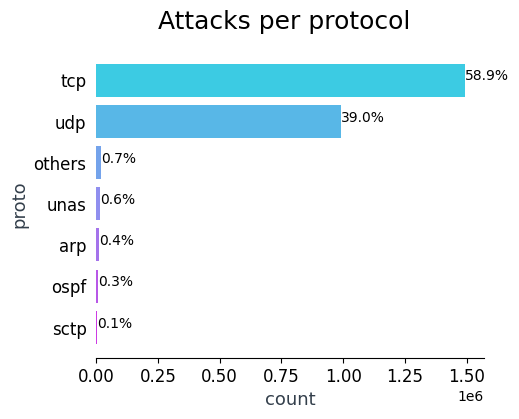

In [ ]:
bar_plot_data(dataset, 'proto', 'Attacks per protocol')

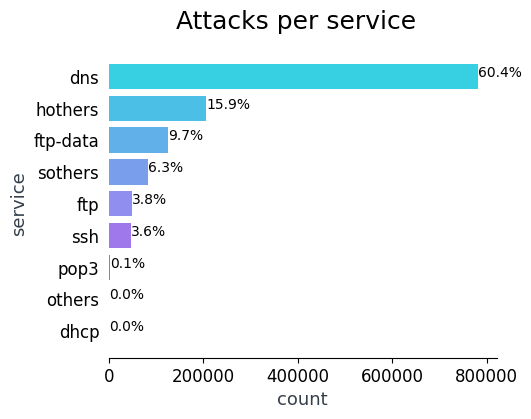

In [ ]:
service=dataset.drop(axis=0,index=dataset[dataset['service']=="-"].index)
bar_plot_data(service, 'service', 'Attacks per service')

In [ ]:
def get_pie_plot_count(df: dict, field: str, subtitle: str):
    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)
    colors = sns.color_palette('cool')
    df_filter = df[field].value_counts().rename_axis(field).reset_index(name='counts')
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    plt.pie(df_filter['counts'], colors=colors, labels=df_filter[field], autopct = '%0.0f%%',
            startangle=90,  textprops={'fontsize': 14})

    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

In [ ]:
df=dataset.drop(axis=0,index=dataset[dataset['attack_cat']=="Normal"].index)
get_pie_plot_count(df, 'srcip', 'Attack distribution per Attacking Source IP')

NameError: ignored

Plotting graph for attack

In [ ]:
df=dataset.drop(axis=0,index=dataset[dataset['attack_cat']=="Normal"].index)
get_pie_plot_count(df, 'state', 'Attack distribution at different states')

NameError: ignored

In [ ]:
def get_histplot_central_tendency(df: dict, fields: list):
    colors = sns.color_palette('cool')
    for field in fields:
        f, (ax1) = plt.subplots(figsize=(10, 5), dpi=100)
        v_dist_1 = df[field].values

        for spline in ['top', 'right', 'left']:
            ax1.spines[spline].set_visible(False)

        sns.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Mean")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
        ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
        ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')
        ax1.legend()
        plt.grid(False)
        plt.plot(color="white", lw=3)
        f.suptitle(f"Representation Histogram for {field}", fontsize=18)

**Plotting Histogram for Live time of packets**

**sttl - Source to destination time Live Value**
  
If the value of 'sttl' is from the range of [60-70] or [240-255] then they may be considered to be an attack and the remaining ranges of live time are non-attack


**dttl - Destination to source time Live value**
       
If the range value of 'dttl' is [0-10] or [240-250] then they may be considered as attack and remaining as non-attack
    



<ipython-input-14-15714ee68155>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)
<ipython-input-14-15714ee68155>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)


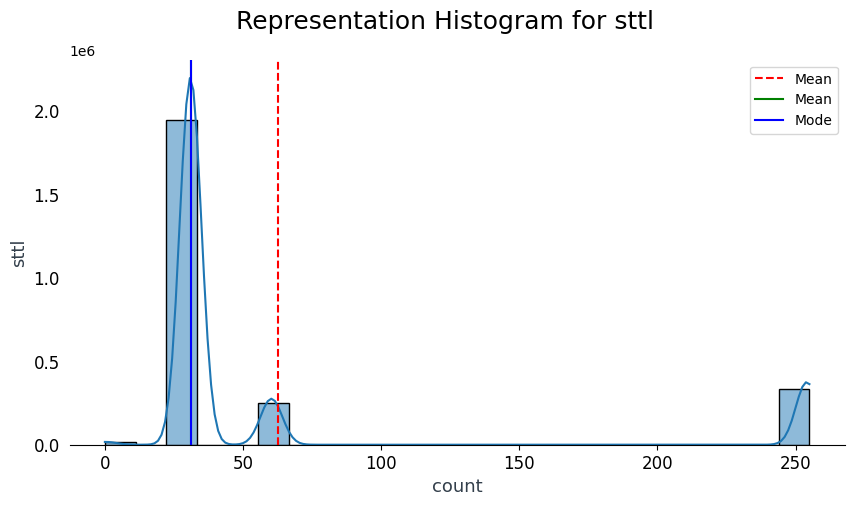

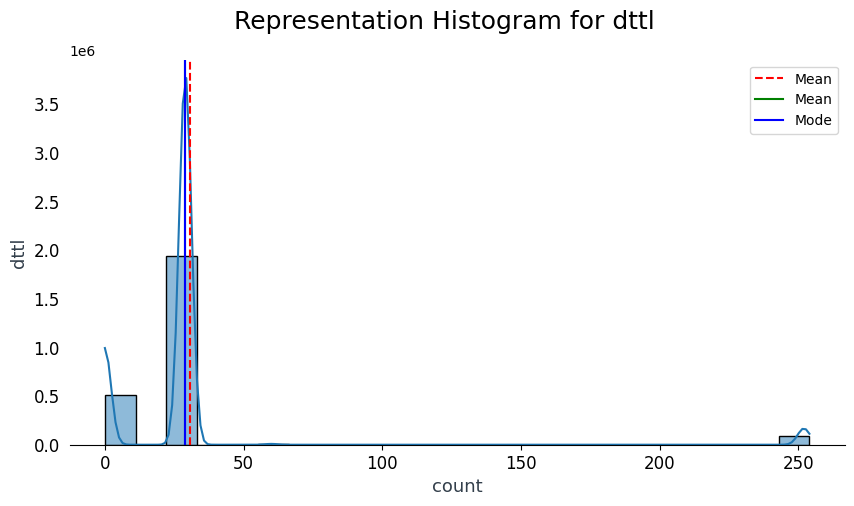

In [ ]:
get_histplot_central_tendency(dataset, ['sttl','dttl'])

Precprocessing the datasets



Dropping the colums with null values


In [ ]:
X1=X.dropna(axis=1)
print(X1.isnull().sum())
X1.shape

srcip               0
dstip               0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
dtype: int64


(2540047, 42)

Identifying the datatype of each columns

In [ ]:

X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 42 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   dstip             object 
 2   proto             object 
 3   state             object 
 4   dur               float64
 5   sbytes            int64  
 6   dbytes            int64  
 7   sttl              int64  
 8   dttl              int64  
 9   sloss             int64  
 10  dloss             int64  
 11  service           object 
 12  Sload             float64
 13  Dload             float64
 14  Spkts             int64  
 15  Dpkts             int64  
 16  swin              int64  
 17  dwin              int64  
 18  stcpb             int64  
 19  dtcpb             int64  
 20  smeansz           int64  
 21  dmeansz           int64  
 22  trans_depth       int64  
 23  res_bdy_len       int64  
 24  Sjit              float64
 25  Djit              float64
 26  Stime         

In [ ]:
print(y)

        attack_cat  Label
0           Normal      0
1           Normal      0
2           Normal      0
3           Normal      0
4           Normal      0
...            ...    ...
2540042     Normal      0
2540043     Normal      0
2540044     Normal      0
2540045     Normal      0
2540046   Exploits      1

[2540047 rows x 2 columns]


Dividing the dataset into Training and Testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1)

Identifying the columns with numerical values and categorical values separately

In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64','uint','float64']).columns
print(numerical_cols)

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst',
       'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm'],
      dtype='object')


In [ ]:
categorical_cols = X_train.select_dtypes(include=['object','bool']).columns
print(categorical_cols)

Index(['srcip', 'dstip', 'proto', 'state', 'service'], dtype='object')


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

Le=LabelEncoder()
StScaler=StandardScaler()
Ohe=OneHotEncoder()

In [ ]:
categorical_cols = X_train.select_dtypes(include=['object','bool']).columns
X_train=X_train.drop(axis=1,columns=categorical_cols)
X_test=X_test.drop(axis=1,columns=categorical_cols)

In [ ]:
categorical_cols=categorical_cols = X_train.select_dtypes(include=['object','bool']).columns

In [ ]:
# define the transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst',
       'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm'],
      dtype='object'))])

In [ ]:
X_train_transform = col_trans.transform(X_train)

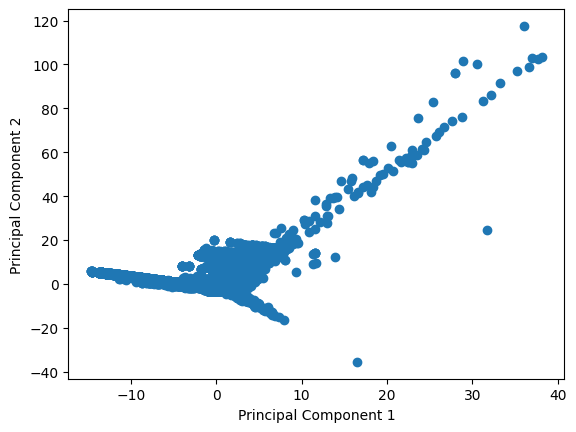

In [ ]:
from sklearn.decomposition import PCA

X_test_transform=col_trans.fit_transform(X_test)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_transform)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#X_train_transform = X_train
#X_test_transform = X_test
#X_train_transform[categorical_cols]=X_train_transform[categorical_cols].apply(Ohe.fit_transform)
#X_test_transform[categorical_cols]=X_test_transform[categorical_cols].apply(Ohe.fit_transform)
#X_train_transform[numerical_cols]=StScaler.fit_transform(X_train_transform[numerical_cols])
#X_test_transform[numerical_cols]=StScaler.fit_transform(X_test_transform[numerical_cols])

In [ ]:
print(X_train_transform.shape)
print(X_test_transform.shape)

(1778032, 37)
(762015, 37)


In [ ]:
X_train_transform

array([[-0.04515627, -0.02708044, -0.0450351 , ..., -0.42978502,
        -0.42001033, -0.51924356],
       [-0.04830075, -0.07759971, -0.22573975, ..., -0.42978502,
        -0.42001033, -0.43038832],
       [-0.04743078, -0.06830924, -0.21915124, ..., -0.07550362,
         0.06622657, -0.07496734],
       ...,
       [-0.04827709, -0.07759971, -0.22573975, ..., -0.42978502,
        -0.42001033, -0.51924356],
       [-0.03418094,  0.61336511, -0.20644748, ..., -0.42978502,
        -0.42001033, -0.51924356],
       [-0.03794531,  0.09891925, -0.15091216, ..., -0.42978502,
        -0.42001033, -0.51924356]])

In [ ]:
print(y.keys())
pd.unique(y.iloc[:,0])
pd.unique(y.iloc[:,1])

Index(['attack_cat', 'Label'], dtype='object')


array([0, 1])

In [ ]:
y1_train=y_train['attack_cat']
y2_train=y_train['Label']
y1_test=y_test['attack_cat']
y2_test=y_test['Label']

In [ ]:
y1_train

2532897     Normal
1233478     Normal
472406      Normal
2092498     Normal
2032025    Generic
            ...   
2468555     Normal
836489      Normal
491263      Normal
491755      Normal
128037      Normal
Name: attack_cat, Length: 1778032, dtype: object

In [ ]:
y2_train

2532897    0
1233478    0
472406     0
2092498    0
2032025    1
          ..
2468555    0
836489     0
491263     0
491755     0
128037     0
Name: Label, Length: 1778032, dtype: int64

In [ ]:
y1_train_transform=Le.fit_transform(y1_train)
y2_train_transform=Le.fit_transform(y2_train)
y1_test_transform=Le.fit_transform(y1_test)
y2_test_transform=Le.fit_transform(y2_test)

In [ ]:
print(y1_train_transform)
print(y2_train_transform)

[6 6 6 ... 6 6 6]
[0 0 0 ... 0 0 0]


**Training Machine Learning Models**
1. Logistic Regression
2. Desision Tree
3. Random Forest


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
models = [('LogisticRegression', LogisticRegression(random_state=123, max_iter=5000, multi_class = "ovr")),
          ('DecisionTree', DecisionTreeClassifier(random_state=123)),
          ('RandomForest', RandomForestClassifier(random_state=123)),
         ]

In [ ]:
for model_name, clf in models:
    print(clf)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=123)
DecisionTreeClassifier(random_state=123)
RandomForestClassifier(random_state=123)


In [ ]:
# define several lists and dataframe to store the CV results and evaluation results on testing data
model_names_list = []
cv_fit_time_mean_list = []
cv_accuracy_mean_list = []
cv_precision_mean_list = []
cv_recall_mean_list = []
cv_f1_mean_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_list = []

for model_name, clf in models:

     # ==== Step 1: Evaluation on Testing data =====

    # fit model
    clf.fit(X=X_train_transform, y=y1_train_transform)

    # predition on testing data

    # predicted label or class
    y_pred_class = clf.predict(X=X_test_transform)

    # predicted probability of the label 1
    y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]

    # append model name
    model_names_list.append(model_name)

    # accuracy
    accuracy_ontest = accuracy_score(y_true=y1_test_transform, y_pred=y_pred_class)

    # precision score
    precision_ontest = precision_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')

    # recall score
    recall_ontest = recall_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')

    # F1 score
    f1_ontest = f1_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')


    # store the above values
    test_accuracy_list.append(accuracy_ontest)
    test_precision_list.append(precision_ontest)
    test_recall_list.append(recall_ontest)
    test_f1_list.append(f1_ontest)

In [ ]:
results_dict1 = {'Model Name': model_names_list,
                 'Test Accuracy': test_accuracy_list,
                 'Test Precision': test_precision_list,
                 'Test Recall': test_recall_list,
                 'Test F1': test_f1_list,
                }

results_df = pd.DataFrame(results_dict1)
results_df.sort_values(by='Test F1', ascending=False)

,Model Name,Test Accuracy,Test Precision,Test Recall,Test F1
0,LogisticRegression,0.966036,0.966036,0.966036,0.966036
2,RandomForest,0.886221,0.886221,0.886221,0.886221
1,DecisionTree,0.880513,0.880513,0.880513,0.880513


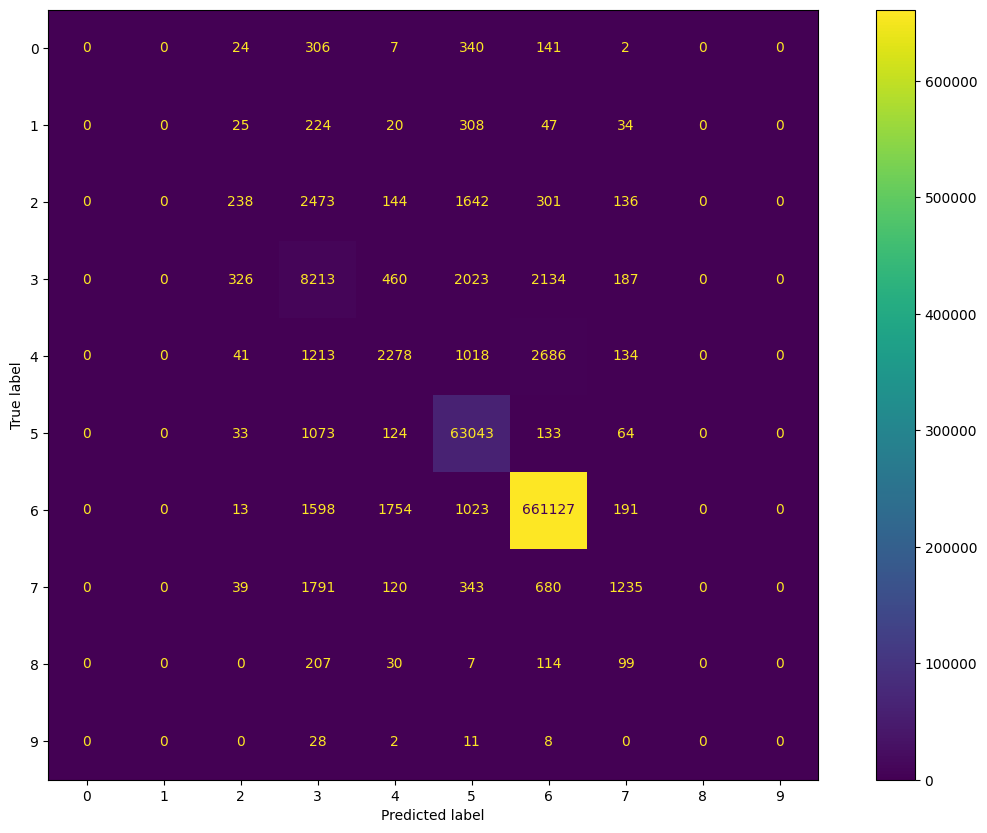

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

clf=LogisticRegression(random_state=123, max_iter=5000, multi_class = "ovr")
clf.fit(X=X_train_transform, y=y1_train_transform)
y_pred_class = clf.predict(X=X_test_transform)
cm_ontest = confusion_matrix(y_true=y1_test_transform, y_pred=y_pred_class)
disp=ConfusionMatrixDisplay(cm_ontest,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(15,10))
disp.plot(ax=ax)